In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Load Dataset
df = pd.read_csv('./dataset/Bangalore_AQI_Dataset.csv')
print("Data Loaded Successfully\n")
print(df.head())

Data Loaded Successfully

        City      Date  AQI  PM2.5   PM10    NO2    SO2    CO    O3
0  Bangalore  01/01/18   68   37.4  73.44  56.44  77.52  0.71  64.6
1  Bangalore  02/01/18   76   41.8  82.08  63.08  86.64  0.80  72.2
2  Bangalore  03/01/18   70   38.5  75.60  58.10  79.80  0.74  66.5
3  Bangalore  04/01/18   78   42.9  84.24  64.74  88.92  0.82  74.1
4  Bangalore  05/01/18   82   45.1  88.56  68.06  93.48  0.86  77.9


In [5]:
# Step 3: Create AQI Category (Target Class)
bins = [0, 50, 100, 150, 200, 300, 500]
labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
df['AQI_Bucket'] = pd.cut(df['AQI'], bins=bins, labels=labels)


In [7]:
# Step 4: Select Features and Target
X = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']]
y = df['AQI_Bucket']

In [9]:
# Drop rows with missing values if any
df.dropna(inplace=True)


In [11]:
# Step 5: Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# Step 7: Train SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # kernel options: 'linear', 'poly', 'rbf', 'sigmoid'
svm_model.fit(X_train_scaled, y_train)


SVC(C=1)

In [17]:
# Step 8: Make Predictions
y_pred = svm_model.predict(X_test_scaled)


In [19]:
# Step 9: Evaluate Model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Model Evaluation:
Accuracy: 0.998046875

Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00        89
    Moderate       0.99      1.00      0.99        71
        Poor       1.00      0.75      0.86         4
Satisfactory       1.00      1.00      1.00       348

    accuracy                           1.00       512
   macro avg       1.00      0.94      0.96       512
weighted avg       1.00      1.00      1.00       512


Confusion Matrix:
 [[ 89   0   0   0]
 [  0  71   0   0]
 [  0   1   3   0]
 [  0   0   0 348]]


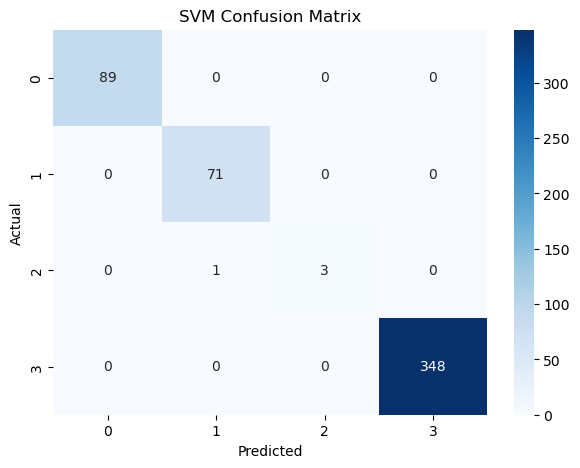

In [21]:
# Step 10: Visualize Confusion Matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = SVC(kernel=kernel, C=1, gamma='scale')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\nKernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))



Kernel: linear
Accuracy: 1.0

Kernel: poly
Accuracy: 1.0

Kernel: rbf
Accuracy: 0.998046875

Kernel: sigmoid
Accuracy: 0.404296875


In [27]:
df['AQI_Bucket'].unique()

['Satisfactory', 'Moderate', 'Good', 'Poor', 'Very Poor']
Categories (6, object): ['Good' < 'Satisfactory' < 'Moderate' < 'Poor' < 'Very Poor' < 'Severe']